# StackOverflow 2018 Survey



## Overview  

This analysis attempts to provide insights for individuals who have a Ph.D. in a field other than Computer Science who are interested in transitioning to a computing-centric field. Important tools, career paths, and factors influencing success (as measured by salary) are extracted from a StackOverflow survey dataset from 2018. The workflow is intended to loosely follow the Cross-Industry Process for Data Mining model (CRISP-DM), which entails (i) establishing a business understanding of the task at hand, (ii) understanding the data, (iii), preparing the data, (iv) modeling, (v) evaluating the model, and, finally, (vi) deploying the results. 

## Business Understanding  

All too commonly, students who pursue a Ph.D. and then decide to transition to industry find it challenging to procure a position that is both highly satisfying and well-paying. Based on personal stories from friends and acquaintances, I assume that career frustration is particularly likely for those who study the fine arts, the humanities, or even a natural science. Compared to those who study a field in high demand, such as Computer Science, the path to a satisfying career can be daunting.  

Many find that they need to take concrete steps to adapt their analytical skills for industry needs. This includes learning modern data analysis tools, *e.g.*, statistical software, one or more computer programming languages, machine learning, *etc*. For PhDs who decide to 'up-skill' and make a career transition, several questions seem particularly relevant:

1. How prevelant are non-Computer Science PhDs in computing-centric fields?
2. What are the top job prospects for this demographic?
3. Which tools are the most important to learn?
4. Is the lack of a Computer Science degree a significant detriment for Ph.D.s?

## Data Understanding  



To answer the above questions, I used data from the StackOverflow developer survey from 2018. Throughout this analysis, I made at least one major assumption (which was most certainly inaccurate): I assumed that the survey results were a representative sample from the population of all the world's developers. The data exploration below eventually revealed certain biases in the data, but the assumption seemed reasonable for the sake of finding approximate answers. 

To begin the analysis, I started by importing necessary libraries.

In [2]:
# Import relevant objects from the standard library
from   collections import Counter
from   pathlib import Path
from   pprint import pprint

# Import needed third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Adjust settings so matplotlib graphs show in the notebook
%matplotlib inline

The data from StackOverflow came as two distinct files - one containing the survey results, and a second containing the schema to interpret the survey data. I loaded the survey results into a pandas dataframe.

In [3]:
csv_path = Path("../data/survey_results_public.csv")
df = pd.read_csv(csv_path, low_memory=False)

Typically, I begin by checking what features are available, what the data types are, and how many records are included. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


Because so many features were included, I found it easier to inspect the schema csv file to become familiar with the features. Nearly 100k records were available.  

The first feature I investigated was the Formal Education field, which indicated the highest level of education attained by each respondent. I needed to define a helper function first that would enhance the visualization of the data.

In [24]:
def add_bar_values(ax, space=0.1):
    """Show numeric values for each category in a barchart
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to be labeled with numeric values
    
    space : float
        Distance to put between bar and numeric label
    """
    
    for p in ax.patches:
        x = p.get_x() + p.get_width() + float(space)
        y = p.get_y() + p.get_height()
        value = int(p.get_width())
        ax.text(x, y, value, ha='left', va='bottom')

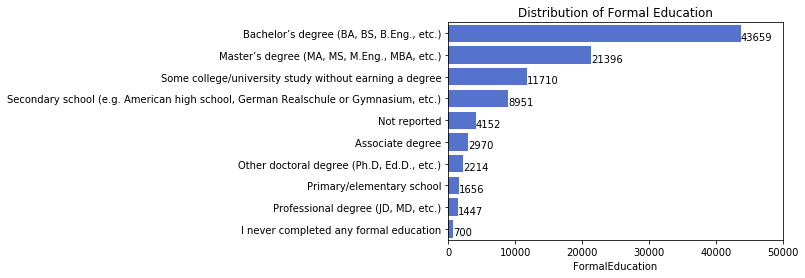

In [30]:
degree_breakdown = df.FormalEducation.fillna('Not reported').value_counts()
fig1 = sns.barplot(x=degree_breakdown, y=degree_breakdown.index, color='royalblue')
add_bar_values(fig1)
plt.xlim(0, 50000)
plt.title("Distribution of Formal Education")
plt.show()

Bachelor's and Master's students dominated the distribution. The survey did not distinguish between the various 'flavors' of doctoral degrees other than to separate out M.D.'s and J.D.'s from all others. For simplicity, I referred to the 'Other doctoral degree' segment as simply Ph.D.'s for the remainder of the analysis. A total of 2214 respondents indicated that they attained this level of education.  

Next, I broke down the Undergrad Major features to get a sense of what fields were studied by the respondents.

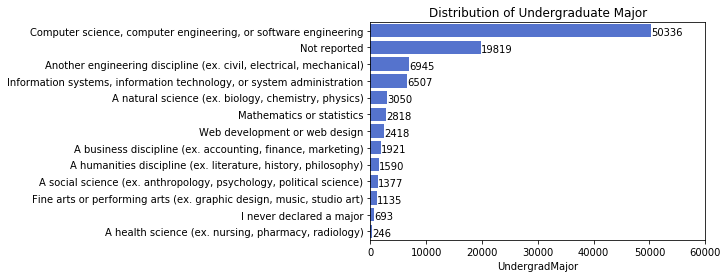

In [31]:
undergrad_breakdown = df.UndergradMajor.fillna('Not reported').value_counts()
fig2 = sns.barplot(x=undergrad_breakdown, y=undergrad_breakdown.index, color='royalblue')
add_bar_values(fig2)
plt.xlim(0, 60000)
plt.title('Distribution of Undergraduate Major')
plt.show()

The category "Computer science, computer engineering, or software engineering" was by far the most prevelant field. Other STEM fields represented most of the other categories --  although business, the humanities, social science, health care, and the fine arts were also represented.

Next, I created a similar breakdown, only filtering this time for respondents that had earned a Ph.D.

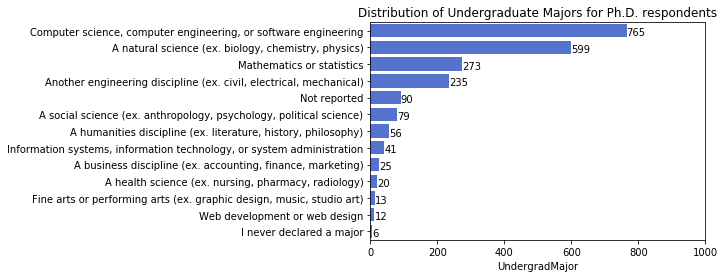

In [34]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
phd_field_breakdown = df.UndergradMajor.fillna('Not reported')[is_phd].value_counts()
fig3 = sns.barplot(x=phd_field_breakdown, y=phd_field_breakdown.index, color='royalblue')
add_bar_values(fig3)
plt.xlim(0, 1000)
plt.title('Distribution of Undergraduate Majors for Ph.D. respondents')
plt.show()

Making the assumption that all Ph.D. students studied the same field in both their undergraduate and graduate studies, I was able to calculate the percentage of the respondents that achieved a Ph.D., but decided not to study Computer Science.

In [37]:
is_compsci = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')
total_n = len(df)
num_phd = sum(is_phd)
num_not_compsci = sum(~is_compsci)
num_both = len(df[is_phd & ~is_compsci])
fraction_phd = num_phd / total_n
fraction_not_compsci = num_not_compsci / total_n
fraction_both = num_both / total_n

print(f"Total respondents: {total_n}\n")
print(f"Number of respondents without computer science undergrad degree: {num_not_compsci}")
print(f"Number of respondents with PhD: {num_phd}")
print(f"Number of respondents without compsci degree, but with PhD: {num_like_me}\n")
print(f"Fraction of respondents without computer science undergrad degree: {fraction_not_compsci:.3f}")
print(f"Fraction of respondents with PhD: {fraction_phd:.3f}")
print(f"Fraction of respondents with both conditions: {fraction_both:.3f}")


Total respondents: 98855

Number of respondents without computer science undergrad degree: 48519
Number of respondents with PhD: 2214
Number of respondents without compsci degree, but with PhD: 1449

Fraction of respondents without computer science undergrad degree: 0.491
Fraction of respondents with PhD: 0.022
Fraction of respondents with both conditions: 0.015


Only 1.5% of the respondents fit the above description.

To answer the more specific question of "How prevalent are non-compsci Ph.D.'s in computing-centric fields", I needed to determine how many of the respondents were employed as a developer.

In [50]:
df.Employment.unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [60]:
is_employed = df.Employment.isin([
    'Employed part-time', 
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed',
])

I also needed to inspect the types of jobs represented in the survey. The survey allowed respondents to indicate multiple developer types for their current employment, so I aggregated the number of times each category was chosen.

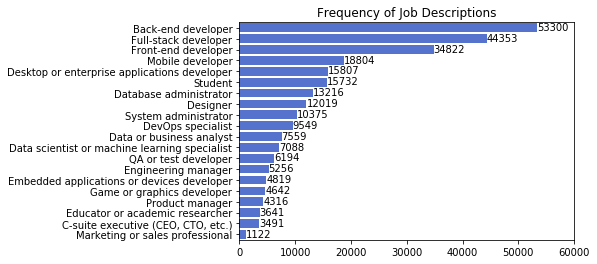

In [58]:
dev_list = list()
for answer in df.DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            dev_list.append(item)
dev_counts = Counter(dev_list)

dev_df = pd.Series(dict(dev_counts))
dev_df = dev_df.sort_values(ascending=False)
fig4 = sns.barplot(x=dev_df, y=dev_df.index, color='royalblue')
add_bar_values(fig4)
plt.title("Frequency of Job Descriptions")
plt.xlim(0, 60000)
plt.show()

Most of the job types could be classified as "computer-centric", so I made the approximation that all employed respondents were in some way involved in a computer centric position. Question 1 could then be addressed as follows:

In [71]:
total_employed = sum(is_employed)
target_demographic = sum(is_employed & is_phd & ~is_compsci)
question_1_ans = target_demographic / total_employed

print(f"Total number of employed respondents: {total_employed}")
print(f"Total number of non-compsci Ph.D.s employed in a computer centric job: {target_demographic}")
print(f"The total fraction of non-compsci Ph.D.s employed in a computer-centric job was: {question_1_ans:.3f}")

Total number of employed respondents: 85157
Total number of non-compsci Ph.D.s employed in a computer centric job: 1357
The total fraction of non-compsci Ph.D.s employed in a computer-centric job was: 0.016


>**Question 1:** How prevelant are non-Computer Science Ph.D.s in computing-centric fields?  
**Answer:** Not very. In the StackOverflow survey, 1.6% of employees in a computer-centric job indicated that they were non-Computer Science Ph.D.s

To double check the above assumption, I tabulated the number of times each category of developer type was chosen by a non-Computer Science Ph.D., and the assumption seemed to hold.

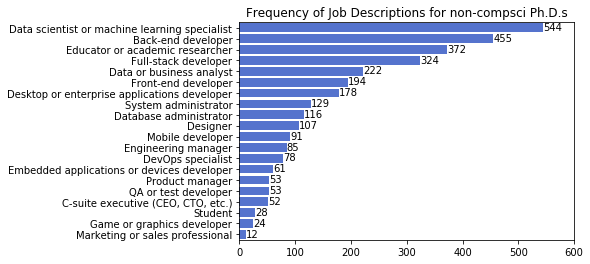

In [72]:
phd_dev_list = list()
for answer in df[is_phd & ~is_compsci & is_employed].DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            phd_dev_list.append(item)
phd_dev_counts = Counter(phd_dev_list)

phd_dev_df = pd.Series(dict(phd_dev_counts))
phd_dev_df = phd_dev_df.sort_values(ascending=False)
fig5 = sns.barplot(x=phd_dev_df, y=phd_dev_df.index, color='royalblue')
add_bar_values(fig5)
plt.title("Frequency of Job Descriptions for non-compsci Ph.D.s")
plt.xlim(0, 600)
plt.show()

The above graph also helped to answer my next question:

>**Question 2:** What are the top computing-centric job prospects for Non-Computer Science Ph.D.'s?  
**Answer:** The top three jobs for Non-Computer Science Ph.D.'s in the StackOverflow dataset include (1) Data scientist or machine learning specialist, (2) Back-end developer, and (3) Educator or academic researcher.

If a person were to transition to a computing-centric field, a good start would be to decipher which tools of the trade are most popular. I chose several features in the dataset that revolved around developer tools, wrote a function to summarize the features, and displayed the results below.

In [120]:
tool_features = (
    'LanguageWorkedWith', 
    'DatabaseWorkedWith', 
    'PlatformWorkedWith', 
    'FrameworkWorkedWith', 
    'IDE', 
    'VersionControl',
)

phd_tools = df.loc[is_phd & ~is_compsci & is_employed, tool_features]

In [121]:
def graph_most_used(df, col):
    """Plot a Pareto-style chart for a categorical features in a dataframe
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with features to be summarized
    col : str
        The name of the categorical column to be summarized with a 
        Pareto-style graph
    """
    
    agg_list = list()
    for response in df[col]:
        if response is not np.nan:
            for item in response.split(';'):
                agg_list.append(item)
    counter = Counter(agg_list)
    
    counter_df = pd.Series(dict(counter))
    counter_df = counter_df.sort_values(ascending=False)
    sns.barplot(x=counter_df, y=counter_df.index, color='royalblue')
    plt.title(col)
    plt.xlabel('Frequency')
    plt.show()

>**Question 3:** Which tools are the most important to learn?  
**Answer:** The graphs below indicate which tools were most popular amongst non-Computer Science Ph.D.'s with a job.  

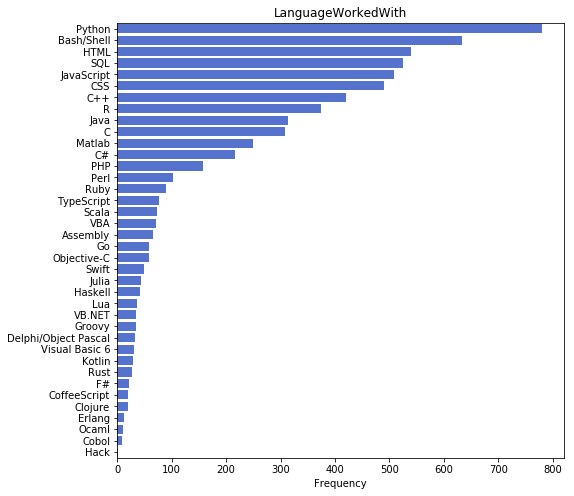

In [113]:
plt.figure(figsize=(8, 8))
graph_most_used(phd_tools, 'LanguageWorkedWith')

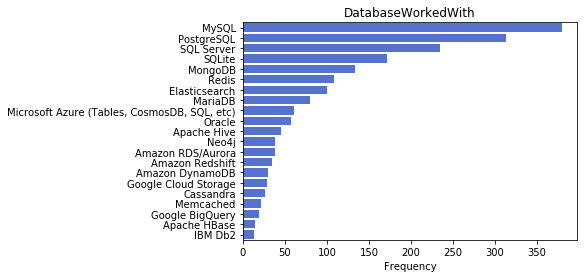

In [114]:
graph_most_used(phd_tools, 'DatabaseWorkedWith')

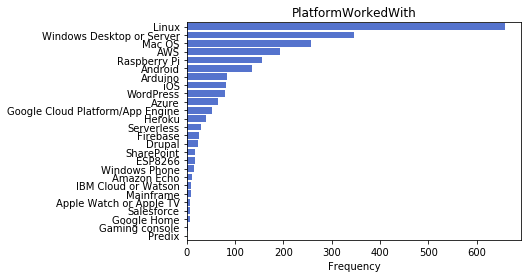

In [115]:
graph_most_used(phd_tools, 'PlatformWorkedWith')

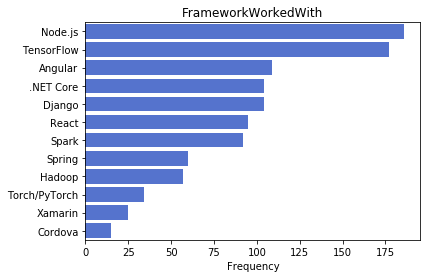

In [116]:
graph_most_used(phd_tools, 'FrameworkWorkedWith')

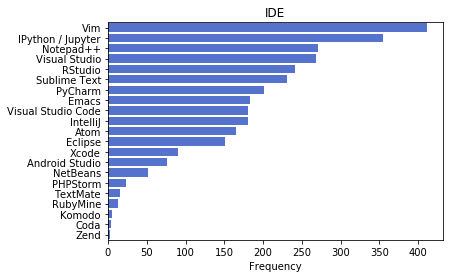

In [117]:
graph_most_used(phd_tools, 'IDE')

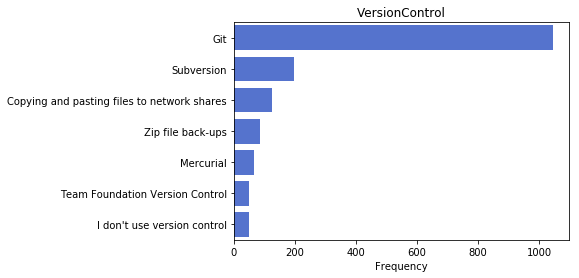

In [118]:
graph_most_used(phd_tools, 'VersionControl')

To summarize, Python was the most popular language to work with. Bash/Shell, HTML, and SQL were also widely used. Relational databases appeared to be more widespread than others. Linux was used about twice as much as Windows, although Windows was used more commonly than MacOS. Node.Js appeared to be the most popular web framework, while TensorFlow dominated the AI frameworks. Most of this demograhic had experience with Vim and Jupyter notebooks, and finally, Git was by far the most common version control software used.

To answer my final question, "Is the lack of a Computer Science degree a significant detriment for Ph.D.s?", I needed a two-part approach. I wanted to answer this question in terms of job satisfaction and also in terms of salary. Are non-Computer Science Ph.D.'s happy with their jobs? How critical is the Computer Science degree in determining salary?  

For the first question, I plotted the distribution of job satisfaction for each job category, sorted for non-Computer Science Ph.D. respondents. I started by sorting and inspecting the JobSatisfaction feature.

In [124]:
phd_satisfaction_df = df.loc[is_phd & ~is_compsci & is_employed, ('JobSatisfaction', 'DevType')]

In [125]:
phd_satisfaction_df.JobSatisfaction.unique()

array(['Slightly satisfied', 'Extremely satisfied',
       'Slightly dissatisfied', 'Moderately satisfied', nan,
       'Moderately dissatisfied', 'Neither satisfied nor dissatisfied',
       'Extremely dissatisfied'], dtype=object)

I then assigned an ordinal numeric value to each category in JobSatisfaction.

In [126]:
satisfaction_mapping = {
    'Extremely dissatisfied': 0,
    'Moderately dissatisfied': 1,
    'Slightly dissatisfied': 2, 
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4, 
    'Moderately satisfied': 5, 
    'Extremely satisfied': 6,
    np.nan: np.nan,
}

phd_satisfaction_df['JobSatisfactionOrd'] = phd_satisfaction_df['JobSatisfaction'].replace(satisfaction_mapping)

In [128]:
phd_satisfaction_list = list()
for idx, response in phd_satisfaction_df.iterrows():
    dev_type = response.DevType
    satisfaction = response.JobSatisfactionOrd
    if dev_type is not np.nan:
        for job in dev_type.split(';'):
            phd_satisfaction_list.append((job, satisfaction))
satisfaction = pd.DataFrame(phd_satisfaction_list, columns=['Job', 'Satisfaction'])

In [129]:
satisfaction.head()

,Job,Satisfaction
0,Designer,4.0
1,Embedded applications or devices developer,4.0
2,Data scientist or machine learning specialist,6.0
3,Back-end developer,2.0
4,Database administrator,2.0


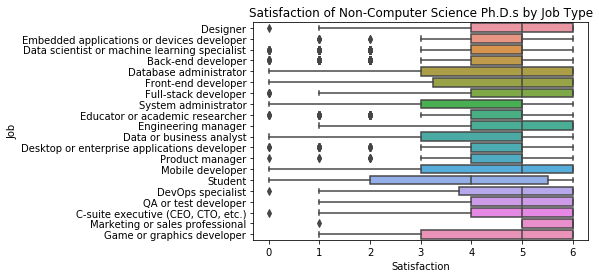

In [132]:
sns.boxplot(data=satisfaction, x='Satisfaction', y='Job')
plt.title('Satisfaction of Non-Computer Science Ph.D.s by Job Type')
plt.show()

## Preparing the Data

In [119]:
def plot_cat_feature_dist(data, sorted_index, title, xlabel, color):
    dist = data.value_counts(dropna=False)
    dist_index = dist.index.fillna('Not reported')
    dist = dist.reindex(sorted_index)
    
    g = sns.barplot(x=dist.index, y=dist, color=color)
    
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    
    return g

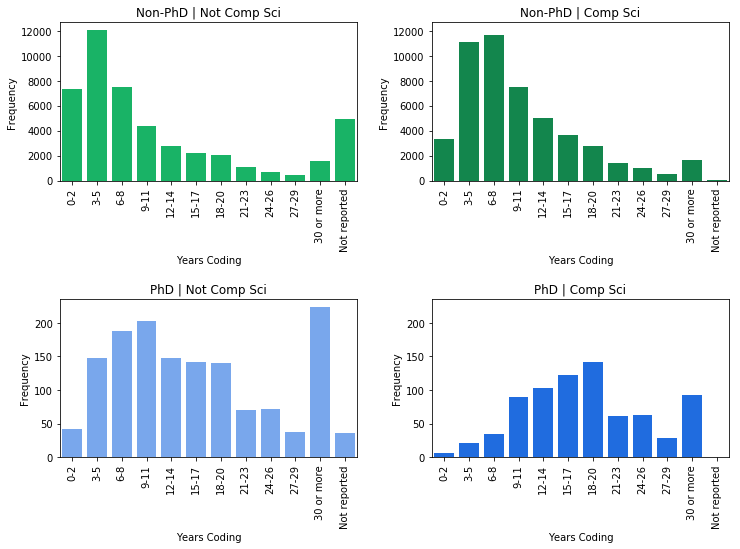

In [75]:
years_coding_df = df.YearsCoding.str.replace(' years', '').replace(np.nan, 'Not reported')

coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          years_coding_df[is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          years_coding_df[is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

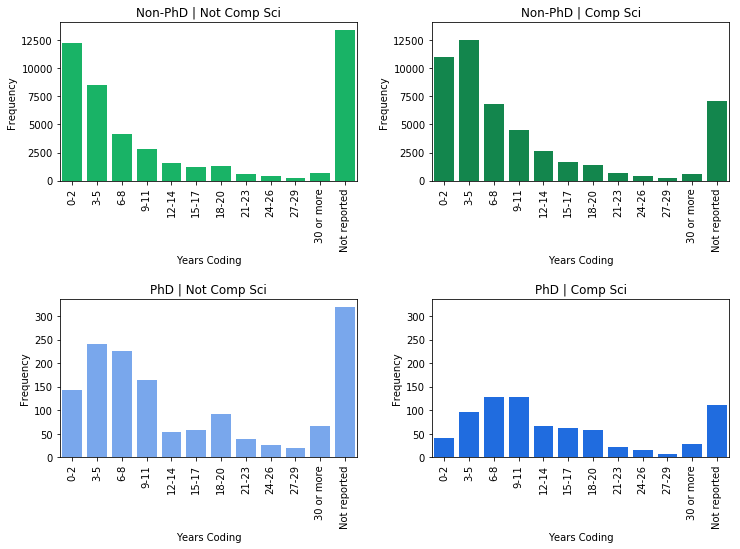

In [76]:
prof_years_coding_df = df.YearsCodingProf.str.replace(' years', '').replace(np.nan, 'Not reported')

prof_coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

## Acknowledgments

[1] Sharon Soussan https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values